# The A-Z of Coding a Quantitative Trading Strategy. A Python Series. 

by Andreas Elledge

## Introduction

A comprehensive tutorial to coding your first quantitative trading strategy.

Creating a personal quantitative strategy is becoming more and more popular amongst at-home traders and/or Python enthusiasts. This article will go through the complete lifecycle of a trading strategy: starting from procuring market data, computing technical indicators, generating trading signals and finally assessing the efficacy of the strategy.

We will use $ETH prices in USD from Kraken’s API and build two strategies based on the Moving Average Convergence/Divergence (MACD) and the Awesome Oscillator (AO).

By the end of this article, one should have a robust foundation to build on, and the capability to test its own trading strategies and assess their potential.

That said, it’s critical to note that the strategies we are deploying here are simplified versions designed for demonstrative purposes. There are additional factors that a pragmatic trading strategy ought to consider, such as trading costs, market influence, risk management, and more. Moreover, tangible trading conditions, like existing portfolio holdings, can significantly influence the outcome of a strategy. Although we’ll use real market data, keep in mind that this article is a tutorial, not financial advice, and aims at enhancing our Python skills.

With this in mind, let’s create our own quantitative trading strategy!

## Part 1: Fetching historical data from Kraken

We first import our required libraries and then initialize our public API. While we are fetching data from Kraken, note that the “ccxt” Python library can be used to fetch data from multiple exchanges like Binance. Be aware that symbol and timeframe formats may vary between exchanges, consequently you might need to check “ccxt” documentation before fetching new data from other exchanges.

We define the symbol and the timeframe. We are looking for Ethereum “$ETH” traded in USD on Kraken “ETH/USD” and daily data.

“fetch_ohlcv” retrieves the OHLCV (Open, High, Low, Close, Volume) data for the symbol and timeframe specified: OHLCV data is fundamental for creating a strategy or conducting various types of technical analysis.

Here, let’s keep in mind that our DataFrame “df” has 720 entries. 1 entry represents 1 day. It’s important to determine the number of days of historical data available for technical indicators and backtesting purposes.


In [1]:
import ccxt
import pandas as pd

# Kraken public API client
exchange = ccxt.kraken()

# Define the market and timeframe
symbol = 'ETH/USD'
timeframe = '1d'

# Fetch OHLCV data
ohlcv = exchange.fetch_ohlcv(symbol, timeframe)

# Convert to DataFrame for easier manipulation
df = pd.DataFrame(ohlcv, columns=['Timestamp', 'Open', 'High', 'Low', 'Close', 'Volume'])

# Convert the timestamp to a readable format
df['Timestamp'] = pd.to_datetime(df['Timestamp'], unit='ms')

# Set timestamp as the index
df.set_index('Timestamp', inplace=True)
df

,Open,High,Low,Close,Volume
Timestamp,,,,,
2021-05-13,3833.90,4039.95,3521.00,3717.06,194715.654977
2021-05-14,3718.97,4178.65,3693.20,4081.01,104788.653981
2021-05-15,4081.00,4134.76,3634.00,3647.75,97098.669671
2021-05-16,3648.15,4200.00,3337.58,3586.04,137111.385507
2021-05-17,3586.30,3587.23,3121.00,3285.06,191928.444511
...,...,...,...,...,...
2023-04-28,1908.73,1923.59,1875.11,1892.70,20958.850906
2023-04-29,1892.70,1919.30,1884.59,1908.26,6701.729233
2023-04-30,1908.39,1939.00,1866.65,1869.58,17871.966215


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 720 entries, 2021-05-13 to 2023-05-02
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    720 non-null    float64
 1   High    720 non-null    float64
 2   Low     720 non-null    float64
 3   Close   720 non-null    float64
 4   Volume  720 non-null    float64
dtypes: float64(5)
memory usage: 33.8 KB


## Part 2: Calculating the MACD and the AO

Here, let’s keep in mind that our DataFrame “df” has 720 entries. 1 entry represents 1 day. It’s important to determine the number of days of historical data available for technical indicators and backtesting purposes.

Part 2: Calculating the MACD and the AO
We now calculate the MACD and AO from our fetch data. The definitions below come from Investopedia and IG International. You will find the links in the ressources section.

“The Moving Average Convergence/Divergence (MACD) is a trend-following momentum indicator that shows the relationship between two exponential moving averages (EMAs) of a security’s price. The MACD line is calculated by subtracting the 26-period EMA from the 12-period EMA.

The result of that calculation is the MACD line. A nine-day EMA of the MACD line is called the signal line, which is then plotted on top of the MACD line, which can function as a trigger for buy or sell signals.” — Investopedia

For the MACD, we compute the MACD Line, the Signal Line, and the MACD Histogram in order to visualize it completely and develop a proper strategy.

“The Awesome Oscillator (AO) is a market momentum indicator which compares recent market movements to historic market movements. It uses a zero line in the centre, either side of which price movements are plotted according to a comparison of two different moving averages.” — IG International

For the AO, we compute a histogram anchored around a zero line.

We calculate both indicators using the “ta” Python library.

In [3]:
import ta

# Calculate MACD Line, Signal Line and MACD Histogram
macd = ta.trend.MACD(df['Close'])
df['macd_line'] = macd.macd()  # MACD Line
df['macd_signal'] = macd.macd_signal()  # Signal Line
df['macd_hist'] = macd.macd_diff()  # MACD Histogram (MACD Line - Signal Line)

# Calculate Awesome Oscillator
ao = ta.momentum.AwesomeOscillatorIndicator(df['High'], df['Low'])
df['ao'] = ao.awesome_oscillator()  # Awesome Oscillator

df

,Open,High,Low,Close,Volume,macd_line,macd_signal,macd_hist,ao
Timestamp,,,,,,,,,
2021-05-13,3833.90,4039.95,3521.00,3717.06,194715.654977,NaN,NaN,NaN,NaN
2021-05-14,3718.97,4178.65,3693.20,4081.01,104788.653981,NaN,NaN,NaN,NaN
2021-05-15,4081.00,4134.76,3634.00,3647.75,97098.669671,NaN,NaN,NaN,NaN
2021-05-16,3648.15,4200.00,3337.58,3586.04,137111.385507,NaN,NaN,NaN,NaN
2021-05-17,3586.30,3587.23,3121.00,3285.06,191928.444511,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2023-04-28,1908.73,1923.59,1875.11,1892.70,20958.850906,8.444588,27.675531,-19.230943,-18.530824
2023-04-29,1892.70,1919.30,1884.59,1908.26,6701.729233,8.064947,23.753415,-15.688467,-11.693206
2023-04-30,1908.39,1939.00,1866.65,1869.58,17871.966215,4.590015,19.920735,-15.330719,-4.294088


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 720 entries, 2021-05-13 to 2023-05-02
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Open         720 non-null    float64
 1   High         720 non-null    float64
 2   Low          720 non-null    float64
 3   Close        720 non-null    float64
 4   Volume       720 non-null    float64
 5   macd_line    695 non-null    float64
 6   macd_signal  687 non-null    float64
 7   macd_hist    687 non-null    float64
 8   ao           687 non-null    float64
dtypes: float64(9)
memory usage: 56.2 KB


In [5]:
df.head(40)

,Open,High,Low,Close,Volume,macd_line,macd_signal,macd_hist,ao
Timestamp,,,,,,,,,
2021-05-13,3833.90,4039.95,3521.00,3717.06,194715.654977,NaN,NaN,NaN,NaN
2021-05-14,3718.97,4178.65,3693.20,4081.01,104788.653981,NaN,NaN,NaN,NaN
2021-05-15,4081.00,4134.76,3634.00,3647.75,97098.669671,NaN,NaN,NaN,NaN
2021-05-16,3648.15,4200.00,3337.58,3586.04,137111.385507,NaN,NaN,NaN,NaN
2021-05-17,3586.30,3587.23,3121.00,3285.06,191928.444511,NaN,NaN,NaN,NaN
2021-05-18,3282.56,3567.25,3242.01,3377.58,95324.163665,NaN,NaN,NaN,NaN
2021-05-19,3376.84,3443.07,1840.66,2443.62,456003.940942,NaN,NaN,NaN,NaN
2021-05-20,2443.62,2995.80,2150.01,2770.82,220544.339396,NaN,NaN,NaN,NaN
2021-05-21,2773.98,2943.00,2104.05,2433.68,266375.066840,NaN,NaN,NaN,NaN


## Part 3: Dropping the NaN values from our DataFrame

This is a brief but crucial part of the tutorial. Given that the data for MACD and AO can’t be calculated due to the absence of historical prices after 2021–05–13, we drop all the NaN values from our DataFrame “df”. Always understand an indicator before adding it to your strategy!

We now have prices for 687 days: from the 2021–06–15 to the 2023–05–02. Note that if you reproduce this code at home, you will fetch data that will have a different timeframe from this article (since Kraken only allows you to get data from the last 720 days, there will be a lag). But not to worry, it’s still the same process!

In [6]:
# Drop NaN values for df since the first MACD data can't be calculated since we don't have the historical prices going back to 2021-04-01
df.dropna(inplace=True)
df

,Open,High,Low,Close,Volume,macd_line,macd_signal,macd_hist,ao
Timestamp,,,,,,,,,
2021-06-15,2582.45,2639.41,2508.89,2543.03,52061.059202,-136.181025,-156.809420,20.628396,-278.990735
2021-06-16,2543.86,2555.00,2352.09,2367.47,56674.394096,-140.218707,-153.491278,13.272571,-231.076382
2021-06-17,2367.47,2457.61,2304.27,2371.99,47118.949838,-141.423630,-151.077748,9.654118,-180.315529
2021-06-18,2371.97,2377.00,2135.00,2232.90,73915.579573,-151.851491,-151.232497,-0.618994,-167.881000
2021-06-19,2232.90,2277.06,2162.02,2166.27,32336.716486,-163.606180,-153.707233,-9.898946,-185.943824
...,...,...,...,...,...,...,...,...,...
2023-04-28,1908.73,1923.59,1875.11,1892.70,20958.850906,8.444588,27.675531,-19.230943,-18.530824
2023-04-29,1892.70,1919.30,1884.59,1908.26,6701.729233,8.064947,23.753415,-15.688467,-11.693206
2023-04-30,1908.39,1939.00,1866.65,1869.58,17871.966215,4.590015,19.920735,-15.330719,-4.294088


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 687 entries, 2021-06-15 to 2023-05-02
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Open         687 non-null    float64
 1   High         687 non-null    float64
 2   Low          687 non-null    float64
 3   Close        687 non-null    float64
 4   Volume       687 non-null    float64
 5   macd_line    687 non-null    float64
 6   macd_signal  687 non-null    float64
 7   macd_hist    687 non-null    float64
 8   ao           687 non-null    float64
dtypes: float64(9)
memory usage: 53.7 KB


## Part 4: Plotting the ETH prices and the indicators

Next, we'll visualize our data, including the price data, MACD, and AO using the matplotlib library.
We now have the data from 2021_06_15 to 2023-05-01

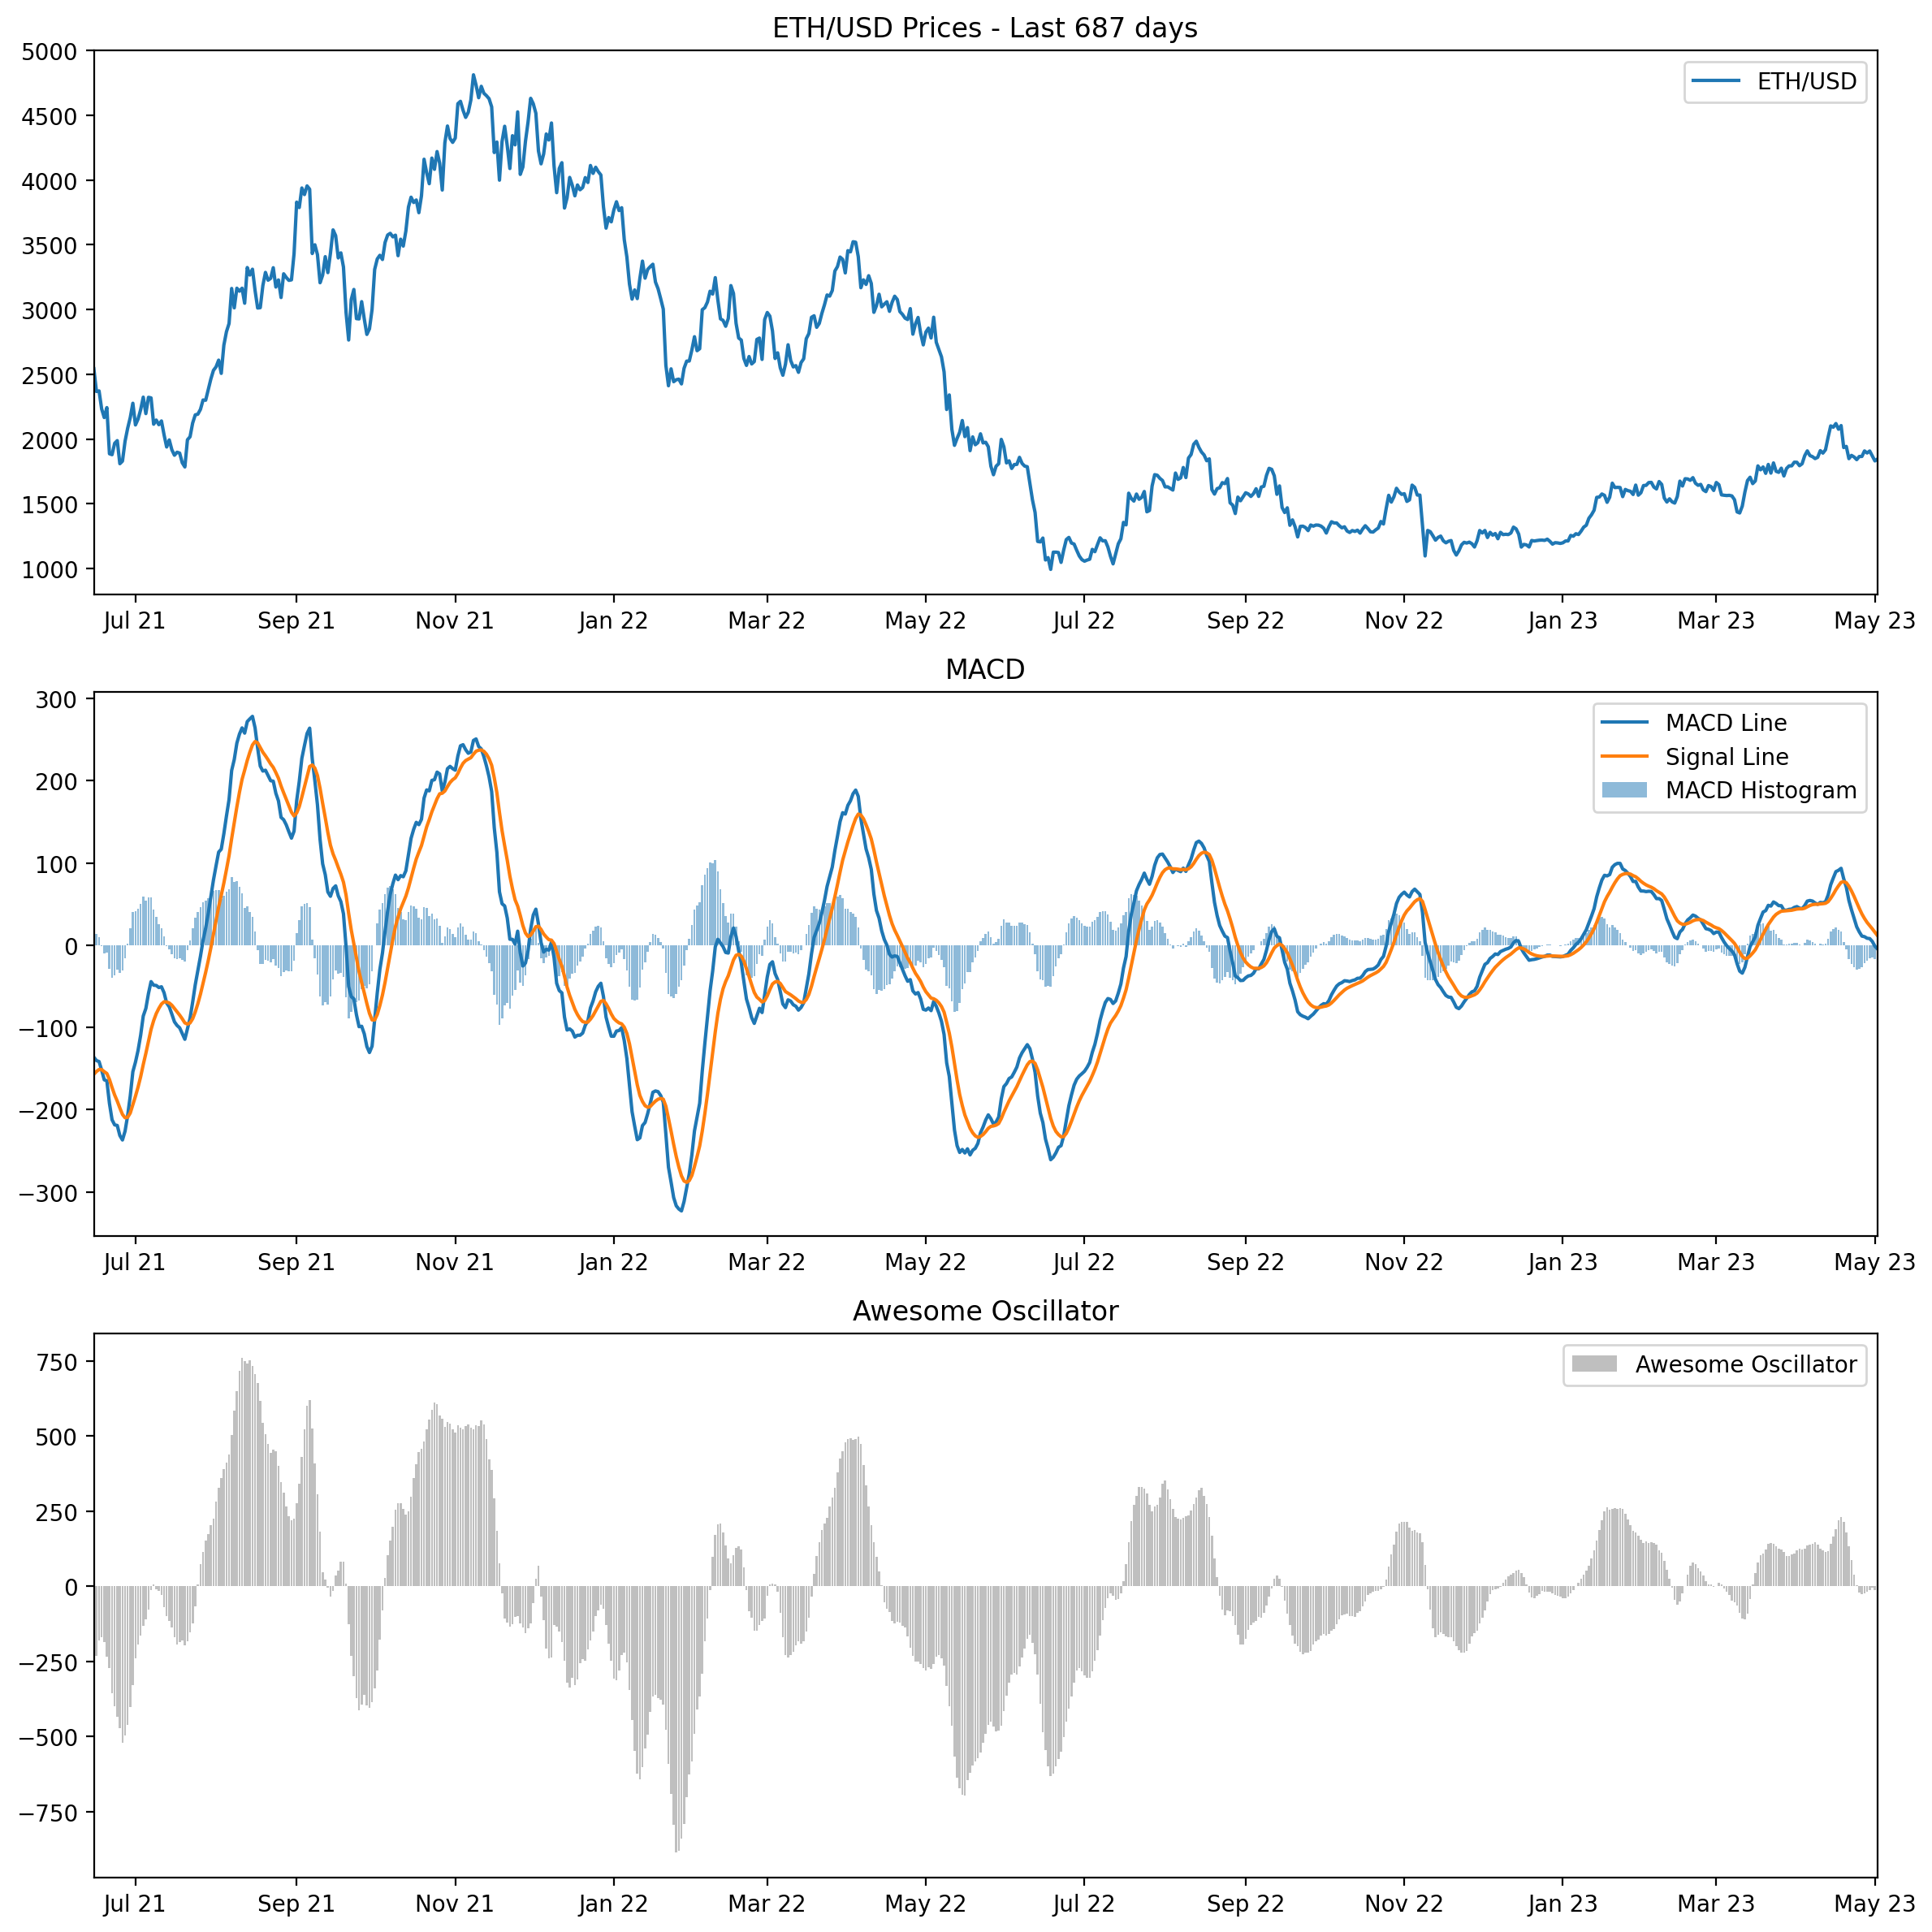

In [8]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Create a figure and a set of subplots
fig, ax = plt.subplots(3, figsize=(12,12), dpi=200)

# Plot ETH prices
ax[0].plot(df.index, df['Close'], label='ETH/USD')
ax[0].set_title('ETH/USD Prices - Last 687 days')
ax[0].legend()
ax[0].set_xlim([df.index.min(), df.index.max()])

# Plot MACD Line, Signal Line and Histogram
ax[1].plot(df.index, df['macd_line'], label='MACD Line') # Plot MACD Line and Signal Line
ax[1].plot(df.index, df['macd_signal'], label='Signal Line') # Plot MACD Line and Signal Line
ax[1].bar(df.index, df['macd_hist'], alpha=0.5, label='MACD Histogram') # Plot MACD Histogram as bar plot
ax[1].set_title('MACD')
ax[1].legend()
ax[1].set_xlim([df.index.min(), df.index.max()])

# Plot Awesome Oscillator
ax[2].bar(df.index, df['ao'], alpha=0.5, label='Awesome Oscillator', color='gray')
ax[2].set_title('Awesome Oscillator')
ax[2].legend()
ax[2].set_xlim([df.index.min(), df.index.max()])

# Set date format
date_format = mdates.DateFormatter('%b %y')
ax[0].xaxis.set_major_formatter(date_format)
ax[1].xaxis.set_major_formatter(date_format)
ax[2].xaxis.set_major_formatter(date_format)

# Show the plot
plt.tight_layout()
plt.show()

## Part 5: Generating trading signals

We’ll define two strategies based on the MACD and AO signals.

Strategy 1: Buy when both MACD and AO are positive, sell when they’re both negative.

Strategy 2: Buy when MACD crosses above the signal line and AO crosses above zero, sell when MACD crosses below the signal line and AO crosses below zero.

In [9]:
import numpy as np

# For Strategy 1
# Create a column 'signal1' such that if both MACD and AO give a buy signal, it returns 1 else returns 0
df['signal1'] = np.where((df['macd_line'] > df['macd_signal']) & (df['ao'] > 0), 1, 0)

# Create a column 'sell_signal1' such that if both MACD and AO give a sell signal, it returns 1 else returns 0
df['sell_signal1'] = np.where((df['macd_line'] < df['macd_signal']) & (df['ao'] < 0), 1, 0)

# For Strategy 2
# Create a column 'signal2' such that if MACD crosses above signal line and AO crosses above zero, it returns 1 else returns 0
df['signal2'] = np.where((df['macd_line'] > df['macd_signal']) & (df['macd_line'].shift() < df['macd_signal'].shift()) & (df['ao'] > 0) & (df['ao'].shift() < 0), 1, 0)

# Create a column 'sell_signal2' such that if MACD crosses below signal line and AO crosses below zero, it returns 1 else returns 0
df['sell_signal2'] = np.where((df['macd_line'] < df['macd_signal']) & (df['macd_line'].shift() > df['macd_signal'].shift()) & (df['ao'] < 0) & (df['ao'].shift() > 0), 1, 0)

# Count the signals
num_signals1 = df['signal1'].sum()
num_sells1 = df['sell_signal1'].sum()
num_signals2 = df['signal2'].sum()
num_sells2 = df['sell_signal2'].sum()

print(f"Number of buy signals in Strategy 1: {num_signals1}")
print(f"Number of sell signals in Strategy 1: {num_sells1}")
print(f"Number of buy signals in Strategy 2: {num_signals2}")
print(f"Number of sell signals in Strategy 2: {num_sells2}")



Number of buy signals in Strategy 1: 216
Number of sell signals in Strategy 1: 236
Number of buy signals in Strategy 2: 1
Number of sell signals in Strategy 2: 2


In summary, both strategies rely on the MACD Line, Signal Line, and AO value to generate buy and sell signals. Strategy 1 is based on simple intersections of the MACD Line and Signal Line, along with the AO value being above or below zero. Strategy 2, on the other hand, focuses on the crossing points of the MACD Line and Signal Line, as well as the crossing points of the AO value above and below zero.

Strategy 2 is more sensitive because it is looking for the points at which the MACD Line crosses the Signal Line and when the AO value crosses zero. These crossing points typically represent changes in market momentum, which is why the strategy is said to be sensitive to changes in momentum.

## Part 6: Plotting the signals on the graph

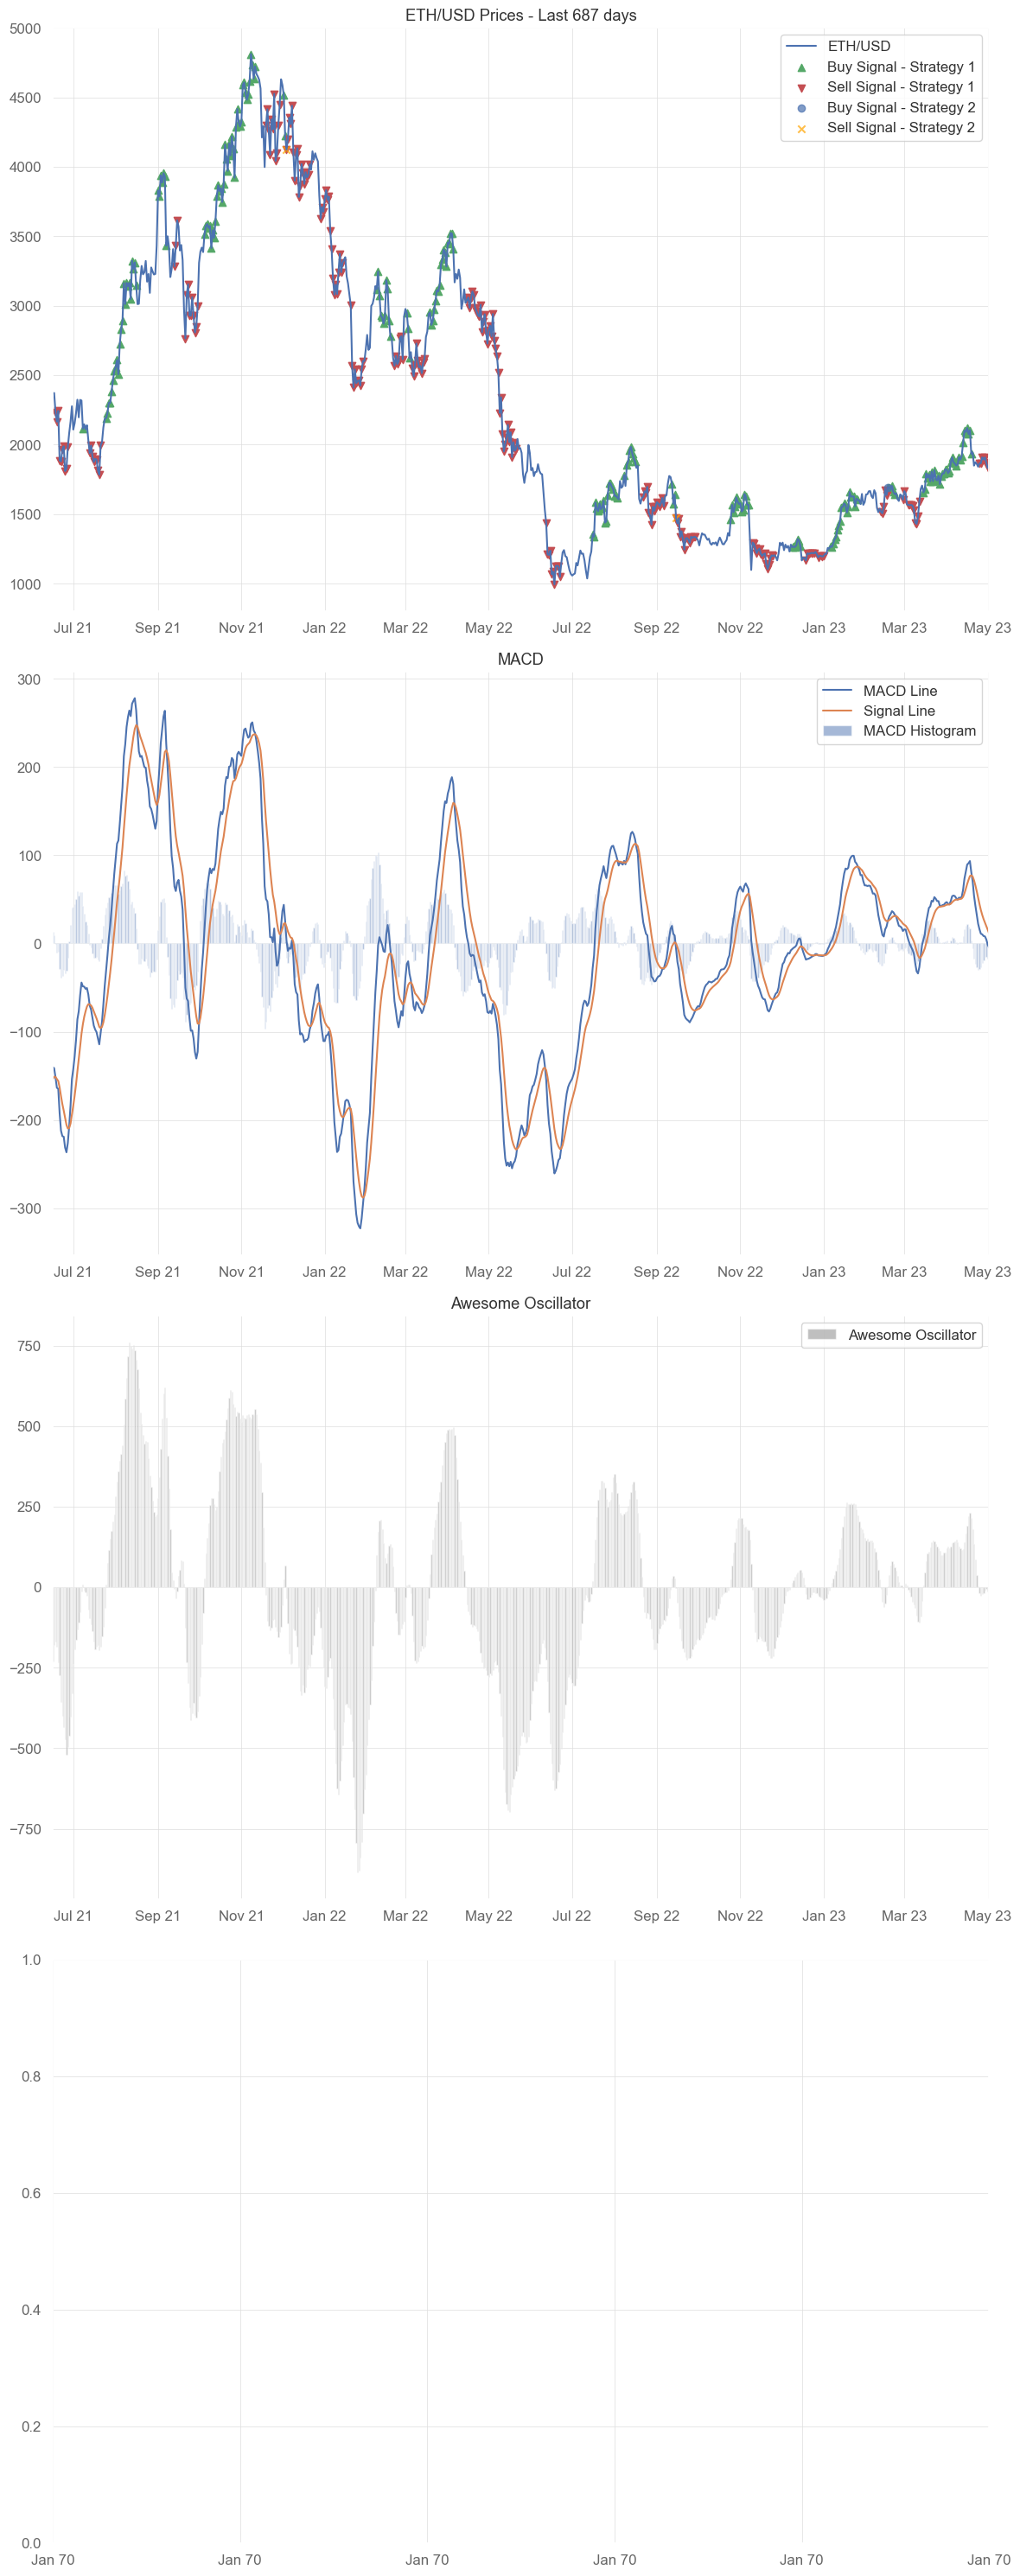

In [14]:
# Plot the signals on the graph
fig, ax = plt.subplots(4, figsize=(12, 30))

# Plot ETH prices
ax[0].plot(df.index, df['Close'], label='ETH/USD')
ax[0].scatter(df[df['signal1'] == 1].index, df[df['signal1'] == 1]['Close'], color='g', marker='^', label='Buy Signal - Strategy 1')
ax[0].scatter(df[df['sell_signal1'] == 1].index, df[df['sell_signal1'] == 1]['Close'], color='r', marker='v', label='Sell Signal - Strategy 1')
ax[0].scatter(df[df['signal2'] == 1].index, df[df['signal2'] == 1]['Close'], color='b', marker='o', label='Buy Signal - Strategy 2', alpha=0.7)
ax[0].scatter(df[df['sell_signal2'] == 1].index, df[df['sell_signal2'] == 1]['Close'], color='orange', marker='x', label='Sell Signal - Strategy 2', alpha=0.7)
ax[0].set_title('ETH/USD Prices - Last 687 days')
ax[0].legend()
ax[0].set_xlim([df.index.min(), df.index.max()])

# Plot MACD Line, Signal Line and Histogram
ax[1].plot(df.index, df['macd_line'], label='MACD Line')
ax[1].plot(df.index, df['macd_signal'], label='Signal Line')
ax[1].bar(df.index, df['macd_hist'], alpha=0.5, label='MACD Histogram')
ax[1].set_title('MACD')
ax[1].legend()
ax[1].set_xlim([df.index.min(), df.index.max()])

# Plot Awesome Oscillator
ax[2].bar(df.index, df['ao'], alpha=0.5, label='Awesome Oscillator', color='gray')
ax[2].set_title('Awesome Oscillator')
ax[2].legend()
ax[2].set_xlim([df.index.min(), df.index.max()])

# Set date format
date_format = mdates.DateFormatter('%b %y')
for a in ax:
    a.xaxis.set_major_formatter(date_format)

# Show the plot
plt.tight_layout()
plt.show()


## Part 7: Backtesting

To evaluate our strategies, we calculate the daily returns based on the generated buy and sell signals: we calculate the daily returns as the percentage change in the closing price.

Then, we calculate the returns for each strategy by multiplying the daily returns with the respective signals (shifted by one day to avoid forward-looking bias). Cumulative returns are then calculated by cumulatively multiplying the daily returns (plus one); it simulates the compounding of returns as if you reinvested the proceeds of each trade.

Strategy 2 generated only 1 buy and 2 sell signals. We won’t be backtesting this strategy.

We recommend using the “quantstats” Python library for detailed reports.

!pip install quantstats

pip install --upgrade pip

Strategy 1:


                           Strategy
-------------------------  ----------
Start Period               2021-06-16
End Period                 2023-05-02
Risk-Free Rate             0.0%
Time in Market             32.0%

Cumulative Return          50.72%
CAGR﹪                     24.43%

Sharpe                     0.6
Prob. Sharpe Ratio         84.05%
Smart Sharpe               0.57
Sortino                    0.91
Smart Sortino              0.86
Sortino/√2                 0.64
Smart Sortino/√2           0.61
Omega                      1.21

Max Drawdown               -38.53%
Longest DD Days            539
Volatility (ann.)          35.64%
Calmar                     0.63
Skew                       0.49
Kurtosis                   15.82

Expected Daily %           0.06%
Expected Monthly %         1.72%
Expected Yearly %          14.65%
Kelly Criterion            8.69%
Risk of Ruin               0.0%
Daily Value-at-Risk        -3.61%
Expected Shortfall (cVaR)  -3.61%

Max Consecutive Wins      

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2021-11-09,2023-01-07,2023-05-02,539,-38.528716,-37.263805
2,2021-08-14,2021-10-10,2021-10-28,75,-19.581892,-18.783528
3,2021-08-08,2021-08-08,2021-08-09,1,-4.731264,0.000000
4,2021-08-03,2021-08-03,2021-08-04,1,-3.918608,0.000000
5,2021-08-12,2021-08-12,2021-08-13,1,-3.656186,0.000000


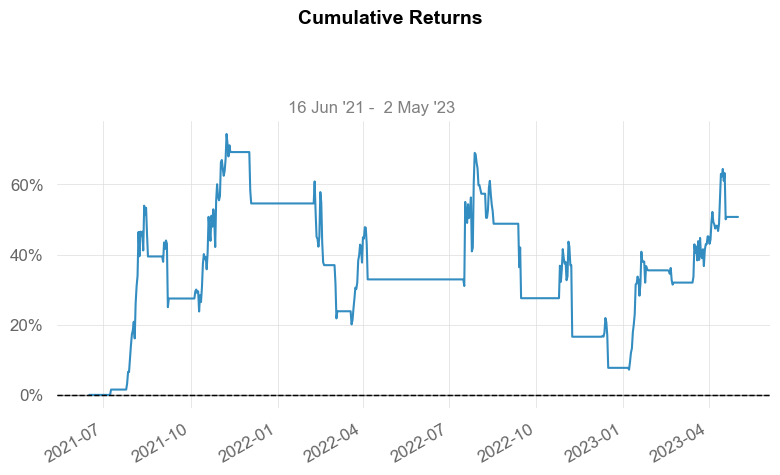

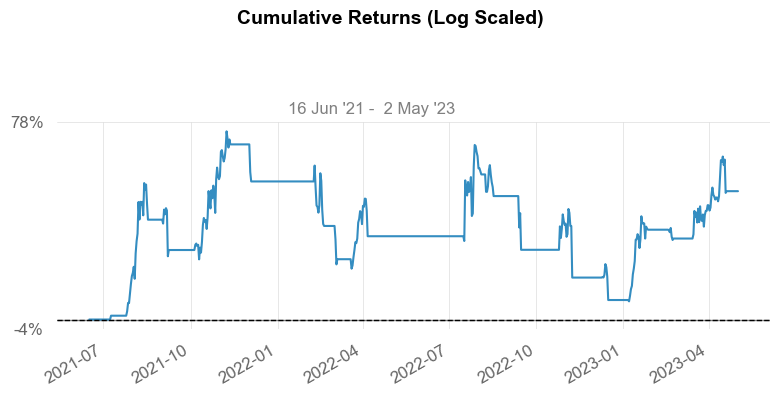

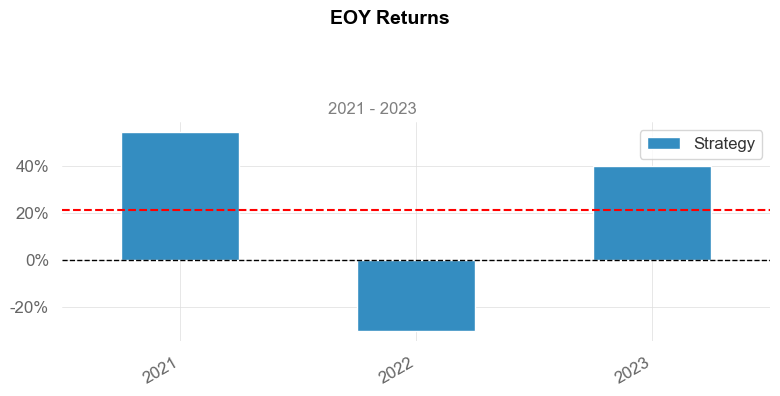

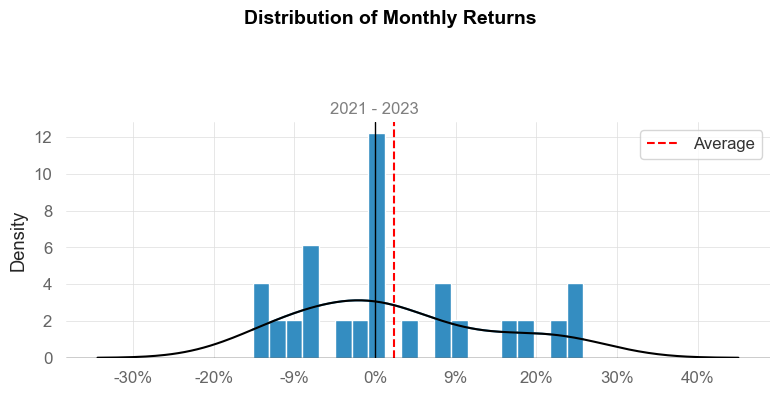

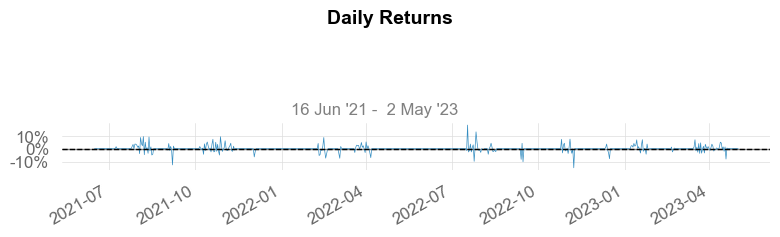

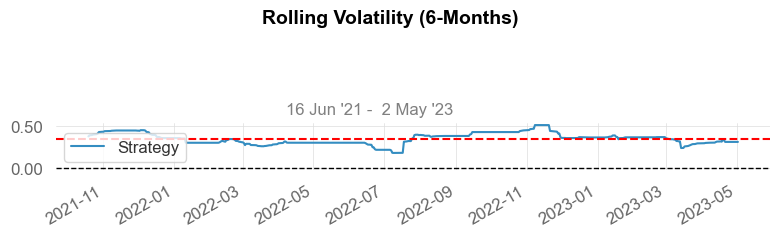

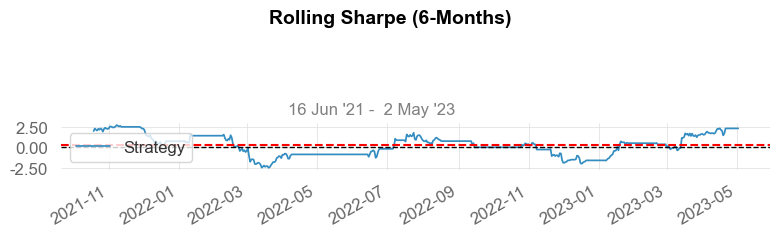

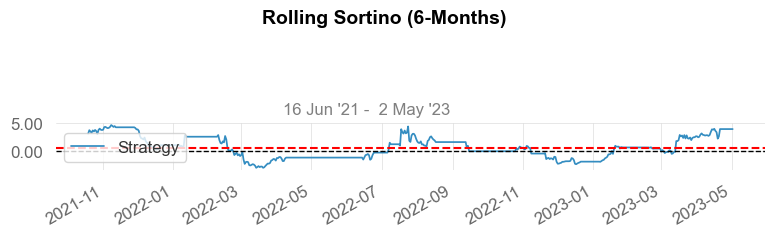

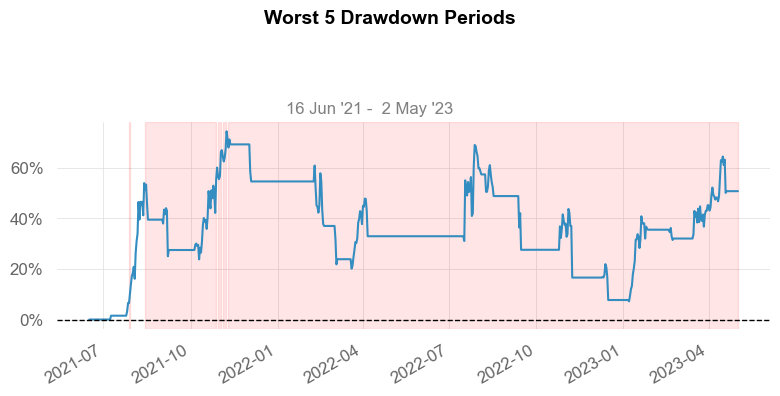

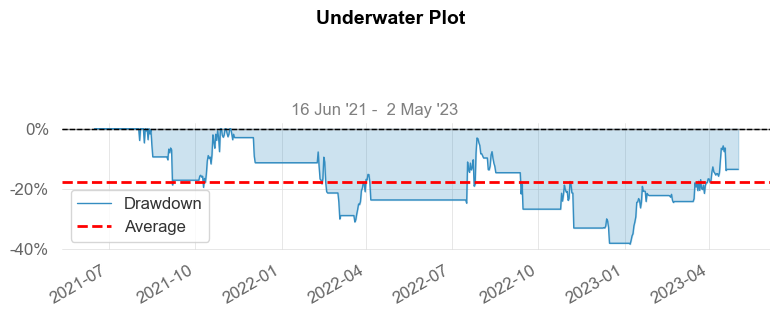

/opt/anaconda3/lib/python3.8/site-packages/quantstats/stats.py:968: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  returns = returns.pivot('Year', 'Month', 'Returns').fillna(0)


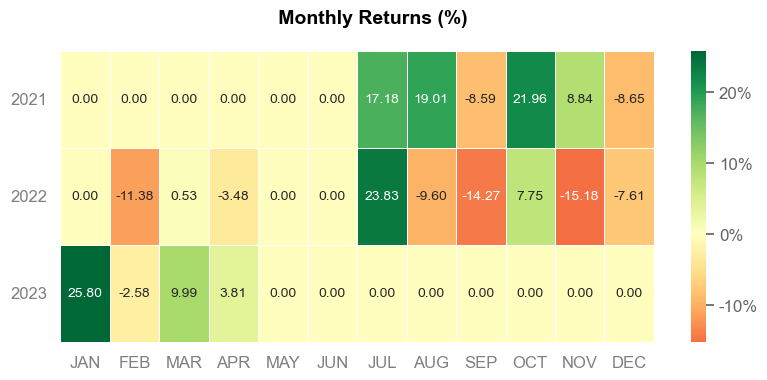

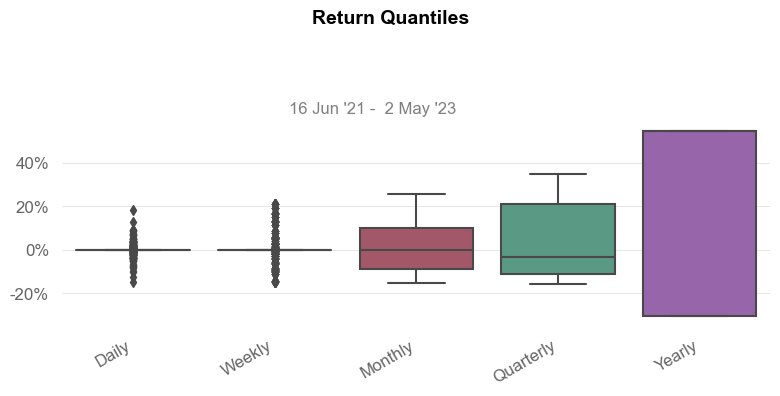



Strategy 2:


                           Strategy
-------------------------  ----------
Start Period               2021-06-16
End Period                 2023-05-02
Risk-Free Rate             0.0%
Time in Market             1.0%

Cumulative Return          -0.11%
CAGR﹪                     -0.06%

Sharpe                     -0.61
Prob. Sharpe Ratio         2.28%
Smart Sharpe               -0.61
Sortino                    -0.61
Smart Sortino              -0.61
Sortino/√2                 -0.43
Smart Sortino/√2           -0.43
Omega                      0.0

Max Drawdown               -0.11%
Longest DD Days            73
Volatility (ann.)          0.06%
Calmar                     -0.53
Skew                       -26.19
Kurtosis                   686.0

Expected Daily %           -0.0%
Expected Monthly %         -0.0%
Expected Yearly %          -0.04%
Kelly Criterion            -
Risk of Ruin               1.0%
Daily Value-at-Risk        -0.01%
Expected Shortfall (cVaR)  -0.01%

Max Consecutive Wins      

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2023-02-18,2023-02-18,2023-05-02,73,-0.105655,NaN


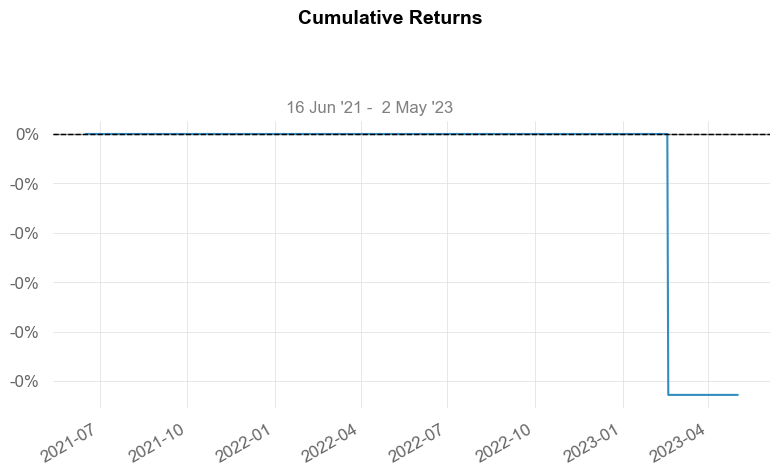

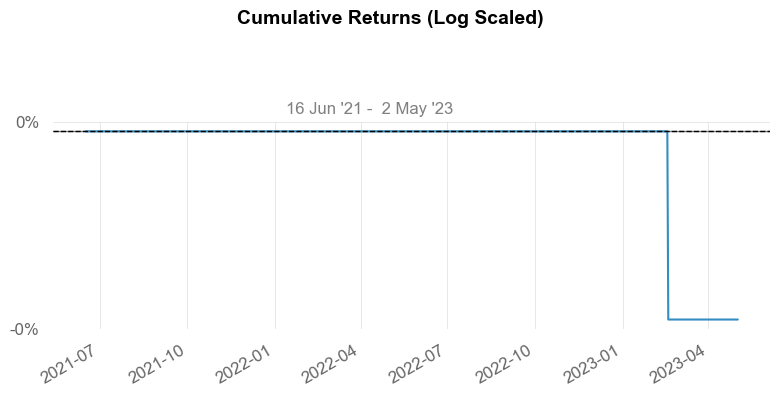

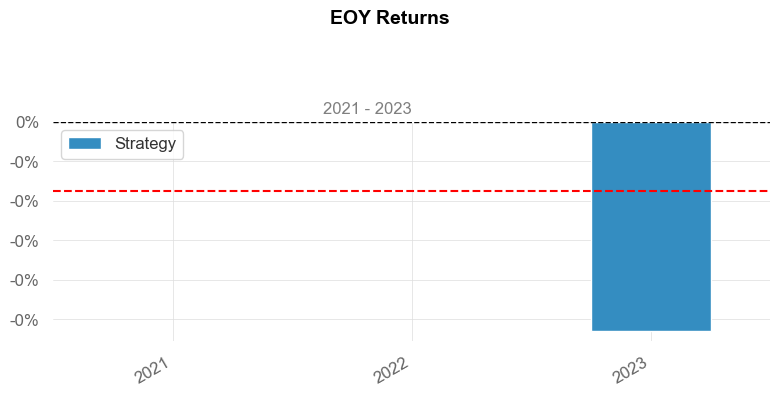

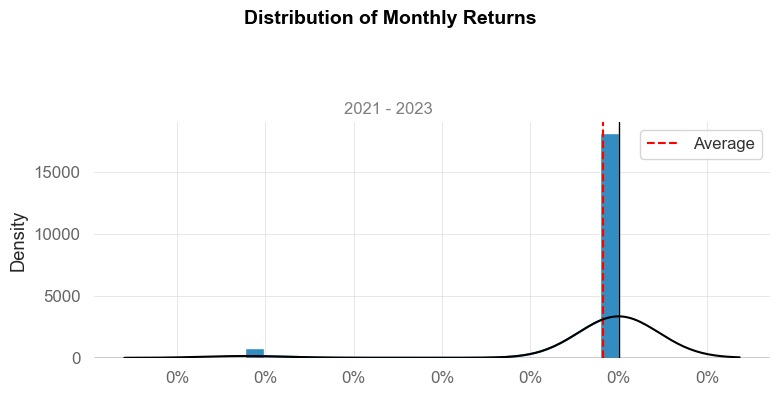

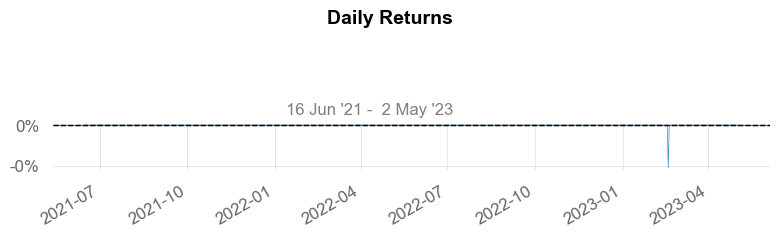

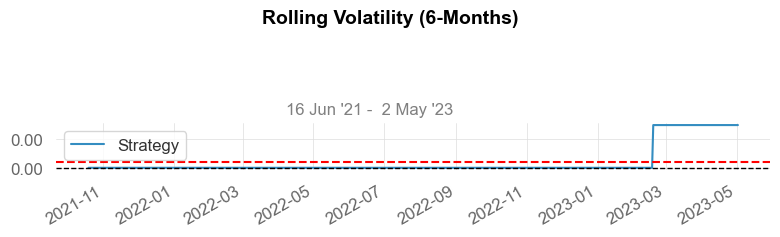

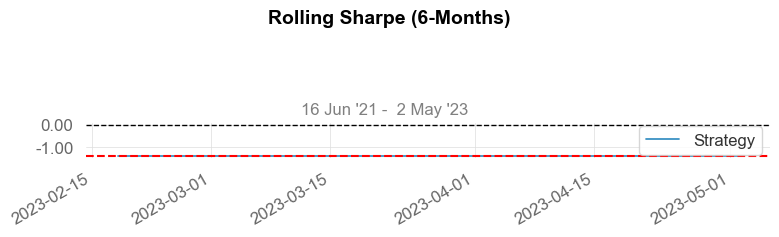

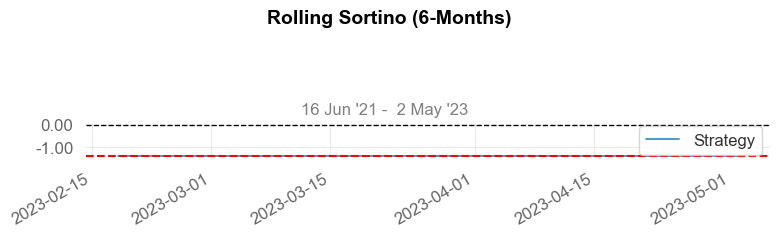

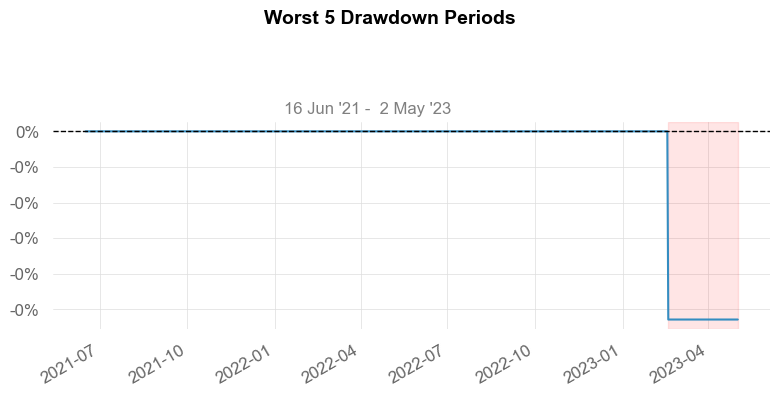

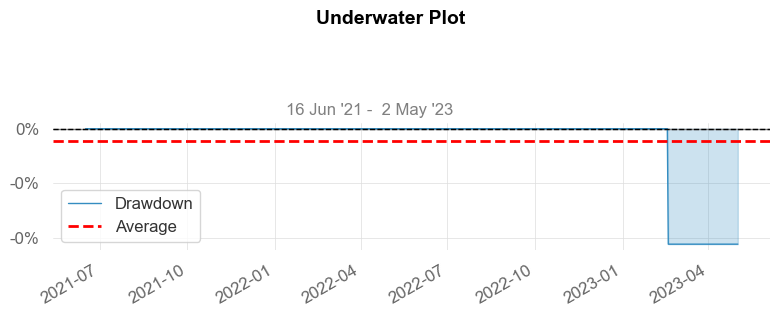

/opt/anaconda3/lib/python3.8/site-packages/quantstats/stats.py:968: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  returns = returns.pivot('Year', 'Month', 'Returns').fillna(0)


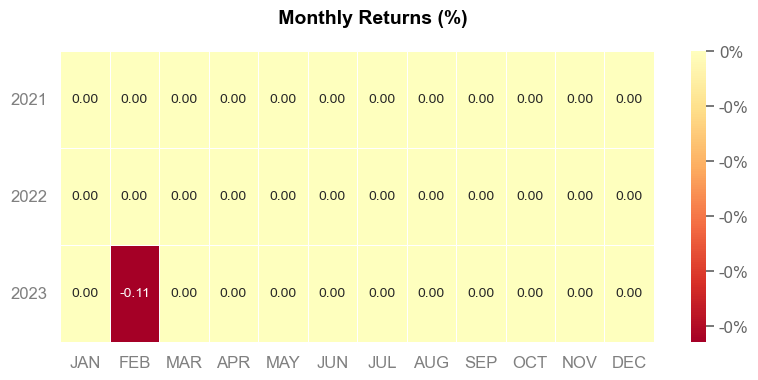

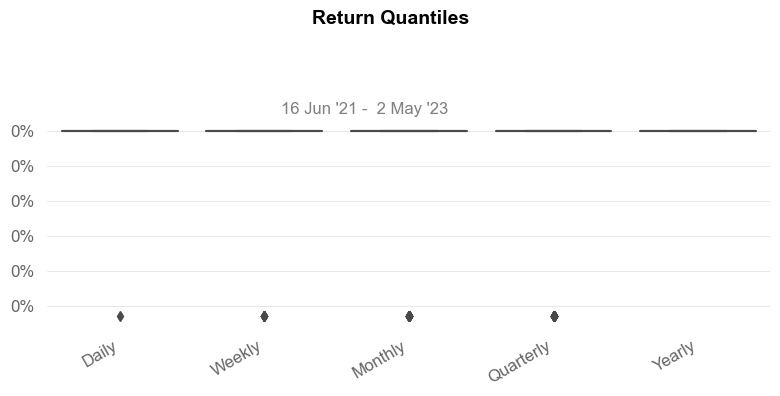

In [13]:
import quantstats as qs

# Calculate daily returns
df['returns'] = df['Close'].pct_change()

# Strategy 1 returns
df['strategy1_returns'] = df['returns'] * df['signal1'].shift()
df['strategy1_cum_returns'] = (1 + df['strategy1_returns']).cumprod()

# Strategy 2 returns
df['strategy2_returns'] = df['returns'] * df['signal2'].shift()
df['strategy2_cum_returns'] = (1 + df['strategy2_returns']).cumprod()

# Drop the NaN values
df.dropna(inplace=True)

# Print out the statistics for Strategy 1
print("Strategy 1:")
qs.reports.full(df['strategy1_returns'])

# Print out the statistics for Strategy 2
print("\n\nStrategy 2:")
qs.reports.full(df['strategy2_returns'])


Quantstats gives us the EOY returns, the distribution of monthly returns, daily returns, the rolling volatility (6-months), the rolling sharpe (6-months), the rolling sortino (6-months), and so on.

Here, we only got 720 historical prices from Kraken’s API and are currently using 687 for backtesting. It’s enough for our tutorial but keep in mind that when conducting a backtest you need to have data that includes all market conditions (bull markets, bear markets, periods of high volatility, periods of low volatility); therefore sometimes much more than 687 days! Indeed, a commonly recommended minimum for many strategies would be at least 5–10 years.

Also, in more advanced backtesting, you would ideally simulate the strategy as closely as possible to how it would be implemented in real trading conditions. Like keeping track of whether you’re currently holding a position or not. It would also include transaction costs, slippage, and other practical considerations.

And it’s done. We hope you now have a robust foundation to build new strategies and assess their potential!

Thanks for reading and stay tuned for more articles in this Python series!

## Ressources:
Brian Dolan, “MACD Indicator Explained, with Formula, Examples, and Limitations”, Investopedia, March 15, 2023.

IG International, “A trader’s guide to using the awesome oscillator”, IG International, Updated Monthly.

QuantStats Library, QuantStats Documentation, last checked on May 10, 2023.

Ta Library, Ta Documentation, last checked on April 28, 2023.